In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
df = pd.read_csv('/Users/tiendat/Desktop/DW_final_dataset/data_resampled.csv')
print(df.shape)
df.head()

(2096, 35)


,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,2,1102,2,1,2,1,1,1,2,...,80,0,8,0,1,6,4,0,5,1
1,49,1,279,1,8,1,1,1,2,3,...,80,1,10,3,3,10,7,1,7,0
2,37,2,1373,1,2,2,4,1,4,4,...,80,0,7,3,3,0,0,0,0,1
3,33,1,1392,1,3,4,1,1,5,4,...,80,0,8,3,3,8,7,3,0,0
4,27,2,591,1,2,1,3,1,7,1,...,80,1,6,3,3,2,2,2,2,0


## **KNN**

In [4]:
# Bước 1: Tải dữ liệu
data = pd.read_csv('/Users/tiendat/Desktop/DW_final_dataset/data_resampled.csv')

# Bước 2: Chuẩn bị dữ liệu
# Chọn các biến số cần thiết
features = ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction',
            'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked']
X = data[features]
y = data['Attrition']

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [5]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print ("Training size: %d" %len(y_train))
print ("Test size : %d" %len(y_test))
df.head()

Training size: 1676
Test size : 420


,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,2,1102,2,1,2,1,1,1,2,...,80,0,8,0,1,6,4,0,5,1
1,49,1,279,1,8,1,1,1,2,3,...,80,1,10,3,3,10,7,1,7,0
2,37,2,1373,1,2,2,4,1,4,4,...,80,0,7,3,3,0,0,0,0,1
3,33,1,1392,1,3,4,1,1,5,4,...,80,0,8,3,3,8,7,3,0,0
4,27,2,591,1,2,1,3,1,7,1,...,80,1,6,3,3,2,2,2,2,0


In [14]:
# Bước 3: Tạo và đào tạo bộ hồi quy KNN
import pickle 
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
file_path = '/Users/tiendat/Desktop/DW_final/knn_model.pkl'

with open(file_path, 'wb') as file:
    pickle.dump(knn, file)

In [7]:
# Bước 4: Dự đoán và đánh giá mô hình
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")
print(classification_report(y_test, y_pred))

Accuracy: 80.71%
              precision    recall  f1-score   support

           0       0.87      0.78      0.82       240
           1       0.74      0.85      0.79       180

    accuracy                           0.81       420
   macro avg       0.81      0.81      0.81       420
weighted avg       0.82      0.81      0.81       420



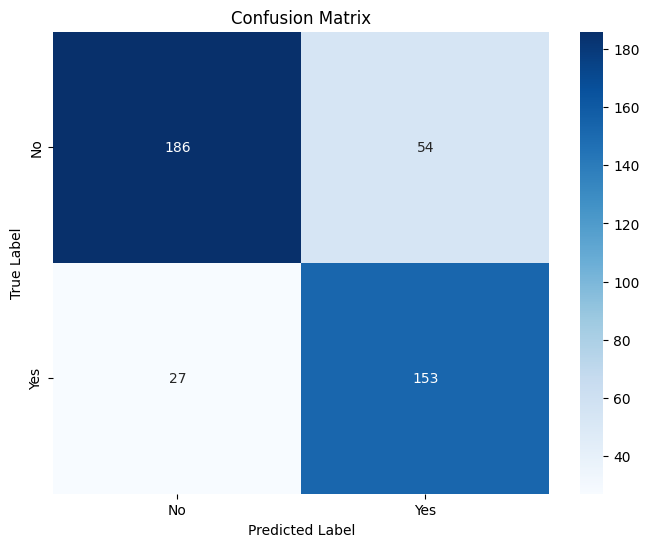

In [8]:
#Tạo confusion matrix:
cm = confusion_matrix(y_test, y_pred)

# Hiển thị confusion matrix bằng seaborn:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [9]:
# Bước 5: Huấn luyện và đánh giá mô hình với các giá trị k khác nhau
neighbors = np.arange(1, 10)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Tính toán độ chính xác trên tập huấn luyện và tập kiểm tra
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

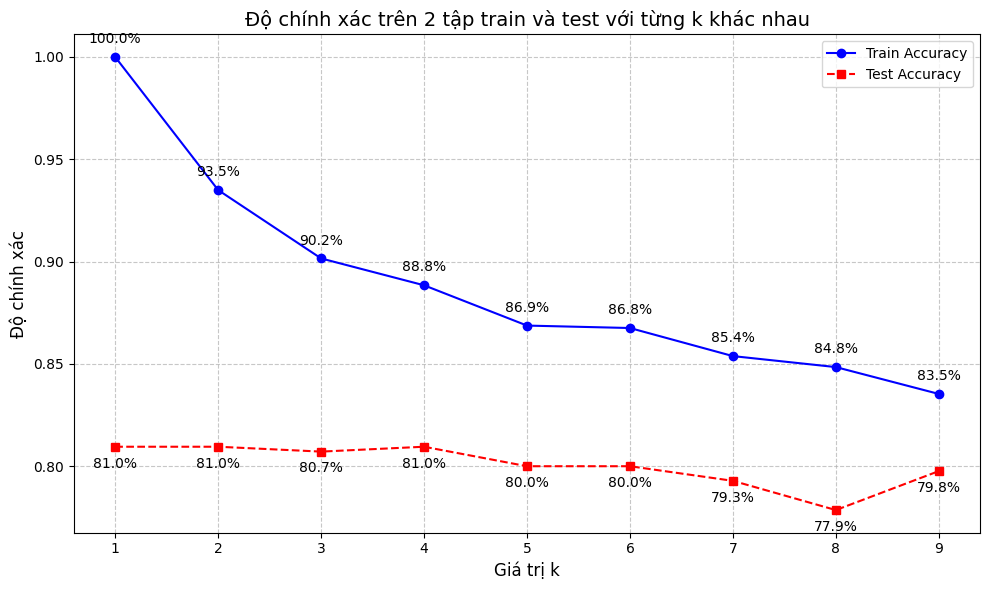

In [10]:
# Bước 6: Vẽ biểu đồ bằng seaborn
plt.figure(figsize=(10, 6))
plt.plot(neighbors, train_accuracy, marker='o', linestyle='-', color='b', label='Train Accuracy')
plt.plot(neighbors, test_accuracy, marker='s', linestyle='--', color='r', label='Test Accuracy')

# Thêm chú thích phần trăm trên từng điểm
for i, txt in enumerate(train_accuracy):
    plt.annotate(f'{txt*100:.1f}%', (neighbors[i], txt), textcoords="offset points", xytext=(0,10), ha='center')
for i, txt in enumerate(test_accuracy):
    plt.annotate(f'{txt*100:.1f}%', (neighbors[i], txt), textcoords="offset points", xytext=(0,-15), ha='center')

plt.title('Độ chính xác trên 2 tập train và test với từng k khác nhau', fontsize=14)
plt.xlabel('Giá trị k', fontsize=12)
plt.ylabel('Độ chính xác', fontsize=12)
plt.xticks(neighbors)
plt.legend(loc='best')
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

## **KNN REGRESSION**

In [15]:
# Bước 1: Tải dữ liệu
df = pd.read_csv('/Users/tiendat/Downloads/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [16]:
# Bước 2: Chuẩn bị dữ liệu
df_scaled = df.copy()
cols_to_scale = ['Age', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction',
                 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'NumCompaniesWorked',
                 'TotalWorkingYears', 'YearsAtCompany']
features = ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction',
            'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked']
scaler = StandardScaler()
df_scaled[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [18]:
#Tạo biến đầu vào và biến mục tiêu
X = df[['Age', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction',
            'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'NumCompaniesWorked',
            'TotalWorkingYears', 'YearsAtCompany']]  # Biến đầu vào
y = df['MonthlyIncome']  # Biến mục tiêu

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Bước 3: Huấn luyện mô hình KNN hồi quy
knn_regressor = KNeighborsRegressor(n_neighbors=3)
knn_regressor.fit(X_train, y_train)
file_path = '/Users/tiendat/Desktop/DW_final/knn_regress.pkl'

with open(file_path, 'wb') as file:
    pickle.dump(knn_regressor, file)

In [ ]:
# Bước 4: Đánh giá mô hình
y_pred = knn_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

Mean Squared Error: 4318443.84542706
R-squared: 0.8069218177142771


In [ ]:
# Dự đoán trên tập kiểm tra
y_pred = knn_regressor.predict(X_test)

# Tính MAE
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

# Tính RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Absolute Error (MAE): 1484.5975056689342
Root Mean Squared Error (RMSE): 2078.0865827551697


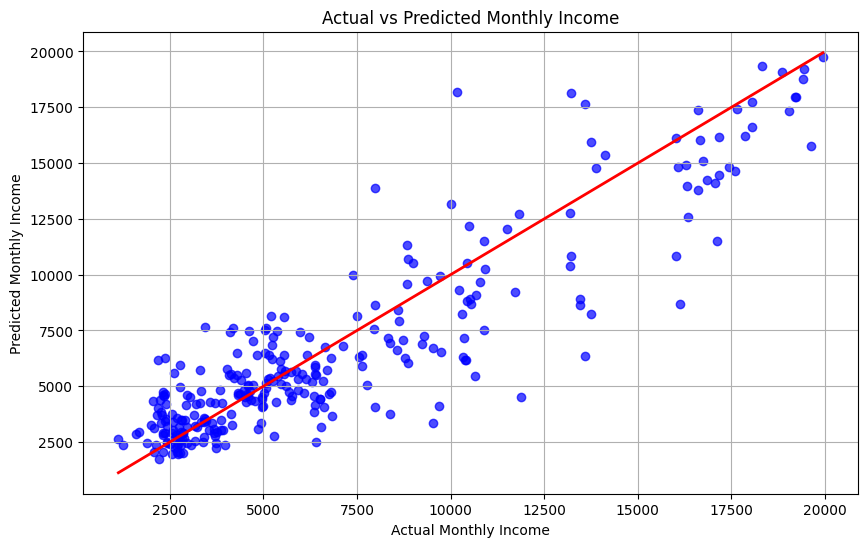

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.title('Actual vs Predicted Monthly Income')
plt.xlabel('Actual Monthly Income')
plt.ylabel('Predicted Monthly Income')
plt.grid(True)
plt.show()